# Advanced Machine Learning 13

## Segmentation Project on Customer_Mall Dataset

### Requirements

**Develop a customer segmentation project using machine learning in python and implement the following subparts:- <br>**

i) Create customer gender visualization to show gender distribution across the dataset using bar plot and pie chart.<br>
ii) Plot a histogram to visualise the distribution of frequencies of customer ages.<br>
iii) Analyze the annual income of customer by plotting a histogram and a density plot.<br>
iv) Analyze the spending scores of customers and examine the outliers count using a box plot.<br>
v) Use K-means clustering and find optimal number of clusters to segment the dataset on the basis of customer spending score and salaries (annual income).

#### Finding the Dataset

We have Finded the Dataset on which further processing will take place

Dataset :- Mall_Customer <br>

Columns :- CustomerID, Genre, Age, Annual Income (k$),Spending Score (1-100)

#### Importing the Libraries

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Importing the Dataset

In [3]:
df=pd.read_csv(r"K:\Advanced Ml\Dataset\Mall_Customers.csv")

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [56]:
df['CustomerID'].duplicated().sum()

0

### Create customer gender visualization to show gender distribution across the dataset using bar plot and pie chart.

**Bar Chart**

In [85]:
from collections import Counter
print(Counter(df['Gender']))

Counter({'Female': 112, 'Male': 88})


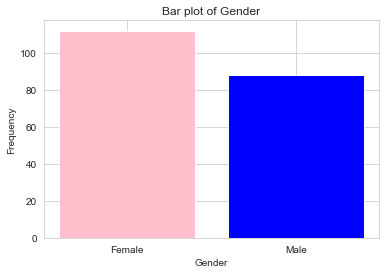

In [88]:
gender_dict=dict(Counter(df['Gender']).most_common(3))
plt.bar(gender_dict.keys(),gender_dict.values(),color=['pink','blue'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Bar plot of Gender')
plt.show()

**Pie Chart**

In [21]:
# Creating Gender_2 column

df.loc[df.Gender=='Female','Gender_2']='Female'
df.loc[df.Gender=='Male','Gender_2']='Male'
df.loc[~df.Gender.isin(['Female','Male']),'Gender_2']='Others'

# Next, let's create a dictionary that conatins the proportion values for each of these: 

proportion=dict(Counter(df['Gender_2']))
for key, values in proportion.items():
    proportion[key]=(values)/len(df)*100

print(proportion)

{'Male': 44.0, 'Female': 56.00000000000001}


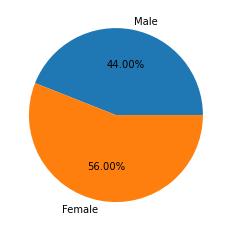

<Figure size 7200x5040 with 0 Axes>

In [27]:
explode=(0,0)
plt.pie(proportion.values(),labels=proportion.keys(),autopct='%1.2f%%',explode=explode)
plt.figure(figsize=(100,70))
plt.show()

<div class="alert alert-block alert-danger">
<b>Insight:</b>
    <ul>
        <li>Maximum Bar is for Female that is 112 Female</li>
        <li>Lower value for Male that is Male</li>
        <li>From bar Chart we got to know Female visitors are 56%</li>
        <li>From bar Chart we got to know Male visitors are 44%</li>
    </ul>
</div>

### Plot a histogram to visualise the distribution of frequencies of customer ages.

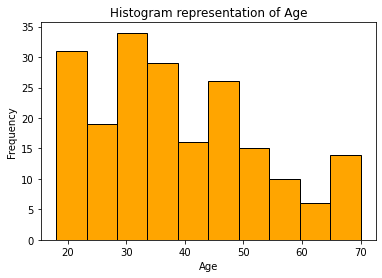

In [40]:
plt.hist(df["Age"],edgecolor="Black",facecolor="orange",bins=10,range=[18,70])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram representation of Age")   #Give Title to Histogram
plt.show()

<div class="alert alert-block alert-danger">
<b>Insight:</b>
    <ul>
        <li>1st Maximum Age of visitor lie in the age group of 28-34</li>
        <li>2nd Maximum Age of visitor lie in the age group of 15-23</li>
        <li>3rd Maximum Age of visitor lie in the age group of 35-39</li>
    </ul>
</div>

### Analyze the Annual Income of customer by plotting a Histogram and a Density plot

**Histogram**

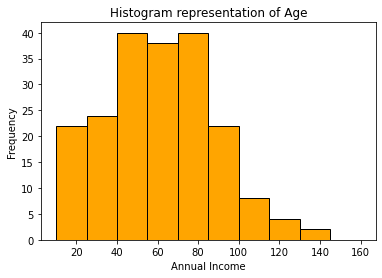

In [48]:
plt.hist(df["Annual Income (k$)"],edgecolor="Black",facecolor="orange",bins=10,range=[10,160])
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.title("Histogram representation of Age")   #Give Title to Histogram
plt.show()

**Density Plot**

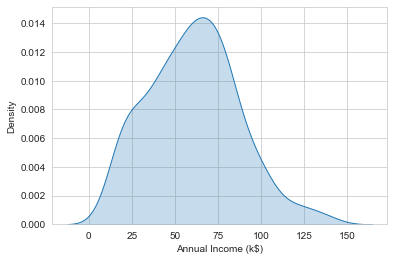

In [72]:
sns.kdeplot(df['Annual Income (k$)'],shade=True)
plt.show()

<div class="alert alert-block alert-danger">
<b>Insight:</b>
    <ul>
        <li>1st Maximum Annual Income of visitor lie in the group of 40k-58k and 70k-82k</li>
        <li>2nd Maximum Annual Income of visitor lie in the group of 59k-69K</li>
        <li>3rd Maximum Annual Income of visitor lie in the group of 24k-40k</li>
    </ul>
</div>

### Analyze the spending scores of customers and examine the outliers count using a box plot.

In [52]:
#Spending Score (1-100)
df['Spending Score (1-100)'].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score (1-100), Length: 84, dtype: int64

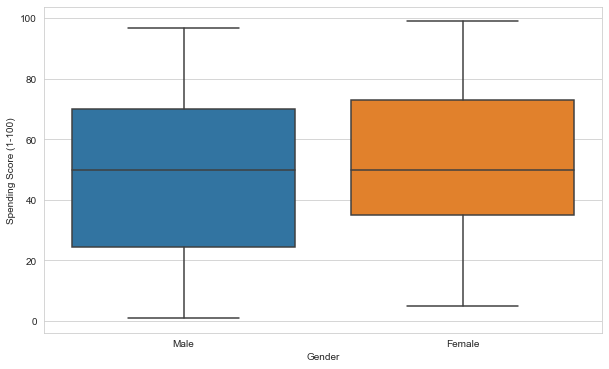

In [62]:
fig=plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.boxplot(x='Gender',y='Spending Score (1-100)',data=df)
plt.show()

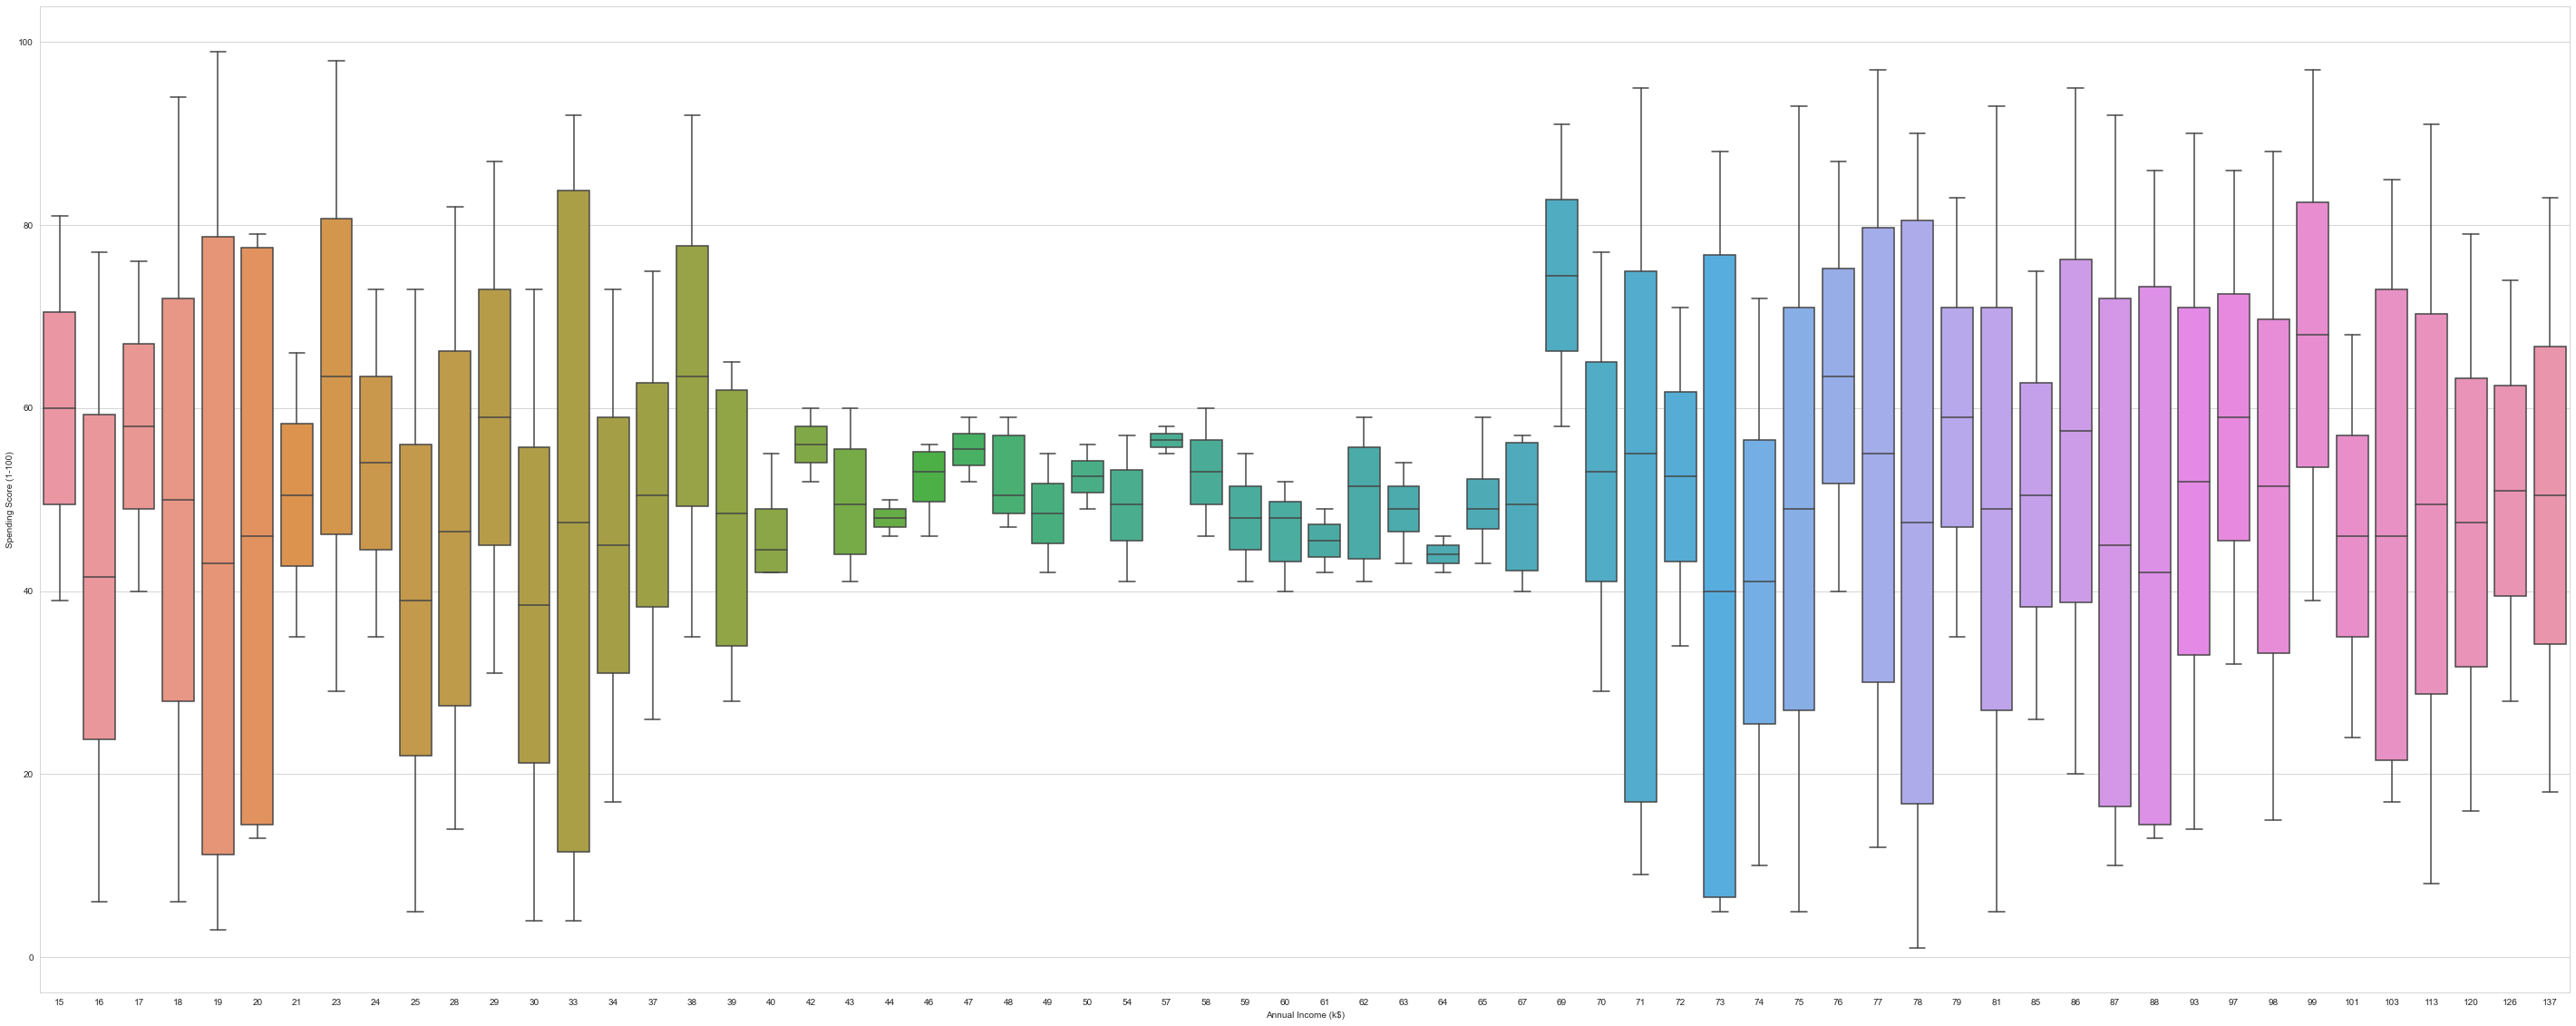

In [71]:
fig=plt.figure(figsize=(50,20))
sns.set_style('whitegrid')
sns.boxplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)
plt.show()

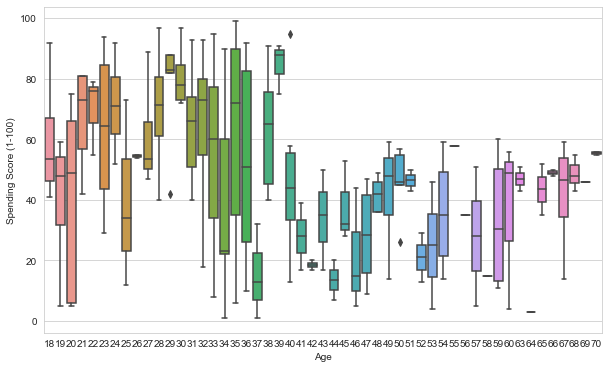

In [63]:
fig=plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.boxplot(x='Age',y='Spending Score (1-100)',data=df)
plt.show()

<div class="alert alert-block alert-danger">
<b>Insight:</b>
    <ul>
        <li>No Outliers are found in Spending Score vs Gender</li>
        <li>No Outliers are found in Spending Score vs Annual Income</li>
        <li>Outliers are found in Spending Score vs Age</li>
    </ul>
</div>

### Use K-means clustering and find optimal number of clusters to segment the dataset on the basis of customer spending score and salaries (annual income).

In [73]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_2
0,1,Male,19,15,39,Male
1,2,Male,21,15,81,Male
2,3,Female,20,16,6,Female
3,4,Female,23,16,77,Female
4,5,Female,31,17,40,Female
...,...,...,...,...,...,...
195,196,Female,35,120,79,Female
196,197,Female,45,126,28,Female
197,198,Male,32,126,74,Male
198,199,Male,32,137,18,Male


In [74]:
x=df.iloc[:,[3,4]].values
print('Independent Variable x: \n',x)

Independent Variable x: 
 [[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58 

#### K Means Algorithm

C:\Users\kshit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


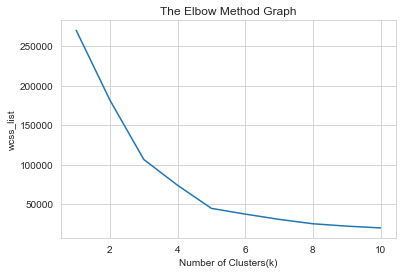

In [75]:
# Finding the optimal number of clusters using elbow method (afterwards no turn is there)

from sklearn.cluster import KMeans
wcc_list=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=1)
    kmeans.fit(x)
    wcc_list.append(kmeans.inertia_) #inertia_ is a predefined attribute of KMeans
plt.plot(range(1,11),wcc_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [76]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcc_list,curve='convex',direction='decreasing')
kl.elbow
# Since the elbow point is at 5. So the number of clusters here will be 5

5

In [77]:
# To train the model, we will use the same line of code
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=1)
y_predict=kmeans.fit_predict(x)

# In the second line of code, we have created the dependent variable y_predict to train the model
# By executing the above line of code, we will get the y_predict varianble
y_predict

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

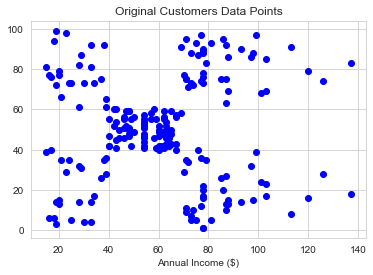

In [78]:
# Visualizing Original Data Points without Clustering

plt.scatter(x[:,0],x[:,1],c='blue',label='All Data Points')
plt.title('Original Customers Data Points')
plt.xlabel('Annual Income ($)')
#plt.ylabel()
plt.show()

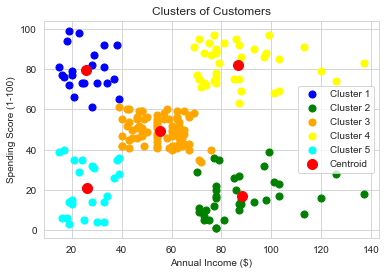

In [79]:
# For first cluster 
plt.scatter(x[y_predict==0,0],x[y_predict==0,1],s=50,c='blue',label='Cluster 1')

# For second cluster 
plt.scatter(x[y_predict==1,0],x[y_predict==1,1],s=50,c='green',label='Cluster 2')

# For third cluster 
plt.scatter(x[y_predict==2,0],x[y_predict==2,1],s=50,c='orange',label='Cluster 3')

# For fourth cluster 
plt.scatter(x[y_predict==3,0],x[y_predict==3,1],s=50,c='yellow',label='Cluster 4')

# For fifth cluster 
plt.scatter(x[y_predict==4,0],x[y_predict==4,1],s=50,c='cyan',label='Cluster 5')

# Plot the centroid. This time we are going to use the kmeans.cluster_centres_
# Attributes that return here the coordinates of the centroid.

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='red',label='Centroid')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [80]:
# Ultimatelly we can define these cluster according to their annual income and spending scores.
# For instance Cluster 1 has high annual income and low spending score

print(kmeans.cluster_centers_)

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


<div class="alert alert-block alert-danger">
<b>Insight:</b>
    <ul>
        <li>From Elbow Method we got 5 Clusters</li>
        <li>Minimum points in Cluster 5</li>
        <li>Maximum points in Cluster 4</li>
    </ul>
</div>